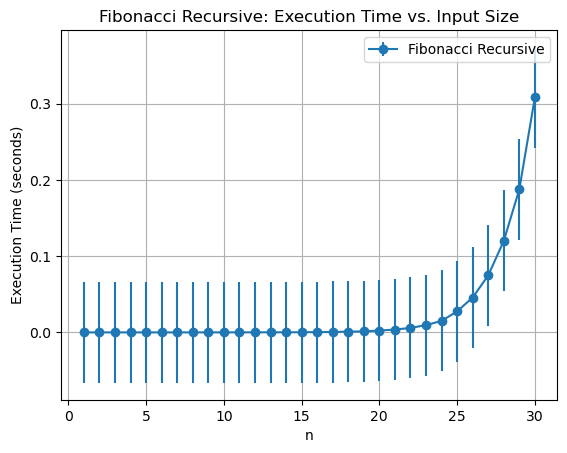

Largest n computed within a reasonable time: 30
0.06623621784975368


In [2]:
#1.1
import timeit
import matplotlib.pyplot as plt
import numpy as np

def fibonacci_recursive(n):
    if n <= 1:
        return n
    else:
        return fibonacci_recursive(n - 1) + fibonacci_recursive(n - 2)

def measure_execution_time(n):
    # Measure execution time for n
    setup_code = "from __main__ import fibonacci_recursive"
    execution_time = timeit.timeit(f"fibonacci_recursive({n})", setup=setup_code, number=10) / 10
    return execution_time

# Range of n values
n_values = np.arange(1, 31)  # Adjust as needed

# Measure execution time for each n
execution_times = [measure_execution_time(n) for n in n_values]

# Calculate error bars (standard deviation)
error_bars = np.std(execution_times)

# Plot n vs. execution time
plt.errorbar(n_values, execution_times, yerr=error_bars, fmt="o-", label="Fibonacci Recursive")
plt.xlabel("n")
plt.ylabel("Execution Time (seconds)")
plt.title("Fibonacci Recursive: Execution Time vs. Input Size")
plt.grid(True)
plt.legend()
plt.show()

# Report the largest n computed within a reasonable time
largest_n_computed = n_values[np.argmax(execution_times)]
print(f"Largest n computed within a reasonable time: {largest_n_computed}")
print(error_bars)

the error bars were determined using standard deviation, which is a measure of the spread of data points around the mean. the largest n I could compute was 30, if I go higher, my laptop freezes and my computer specifications are intel core i3 with 518G SSD.

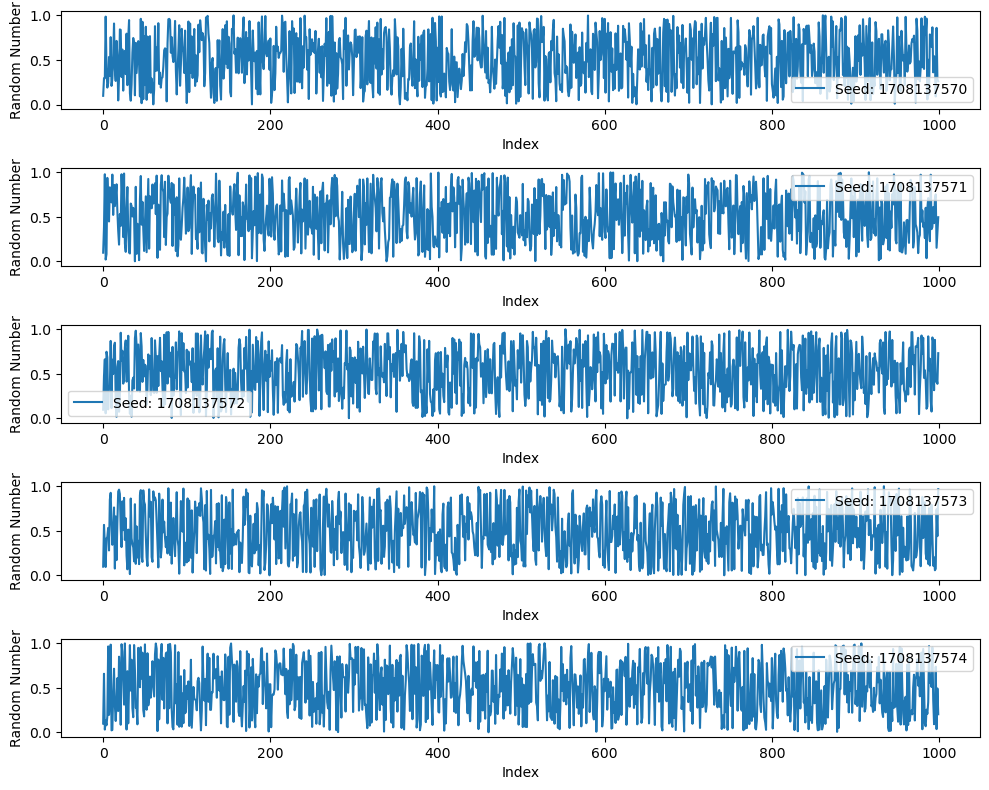

In [2]:
#1.2
import time
import numpy as np
import matplotlib.pyplot as plt

def lcg(seed=None, a=1664525, c=1013904223, m=2**32):
    if seed is None:
        seed = int(time.time())
    while True:
        seed = (a * seed + c) % m
        yield seed / m

# Define the number of random numbers to generate
num_random_numbers = 1000

# Generate random number sequences for different seeds
num_plots = 5  # Number of plots to generate
fig, axs = plt.subplots(num_plots, figsize=(10, 8))

for i in range(num_plots):
    # Generate random numbers using LCG with different seeds
    seed = int(time.time()) + i
    random_gen = lcg(seed=seed)
    random_sequence = [next(random_gen) for _ in range(num_random_numbers)]

    # Plot the random number sequence
    axs[i].plot(random_sequence, label=f'Seed: {seed}')
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Random Number')
    axs[i].legend()

plt.tight_layout()
plt.show()


All the generated plots looked random.

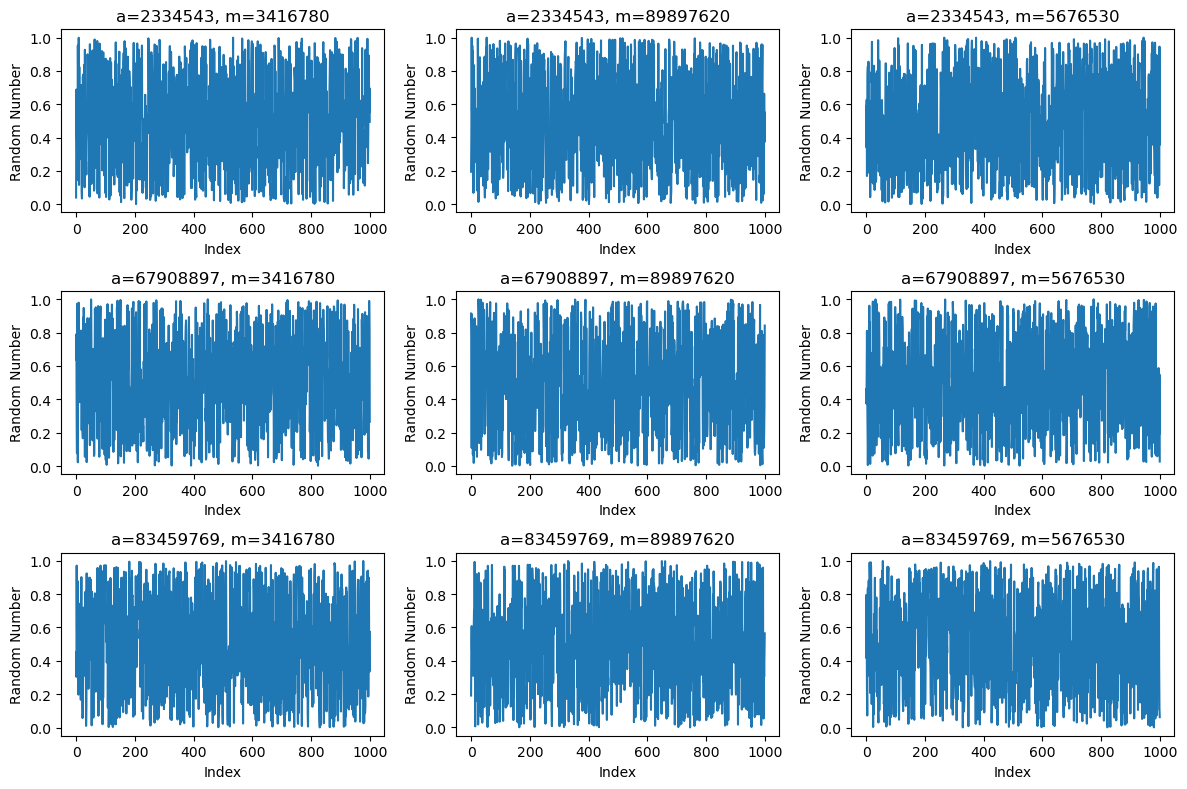

In [6]:
#1.3 Parameter analysis
import numpy as np
import matplotlib.pyplot as plt

def lcg(seed, a, c, m, length):
    state = seed
    output = []
    for _ in range(length):
        state = (a * state + c) % m
        output.append(state / m)
    return output

# Define parameters
seed = 123  # Initial seed
length = 1000  # Length of the sequence

# Define different values of a and m
a_values = [2334543, 67908897, 83459769]  # Multipliers
m_values = [3416780, 89897620, 5676530]  # Moduli

# Generate and plot sequences for each combination of a and m
fig, axs = plt.subplots(len(a_values), len(m_values), figsize=(12, 8))

for i, a in enumerate(a_values):
    for j, m in enumerate(m_values):
        sequence = lcg(seed, a, 0, m, length)
        axs[i, j].plot(sequence)
        axs[i, j].set_title(f'a={a}, m={m}')
        axs[i, j].set_xlabel('Index')
        axs[i, j].set_ylabel('Random Number')

plt.tight_layout()
plt.show()


yes, the choices of a and m can greatly influence the quality of the genereated pseudorandom number sequence

In [7]:
#1.4 Statistical tests

import numpy as np
import matplotlib.pyplot as plt

def lcg(seed, a=1664525, c=1013904223, m=2**32):
    x = seed
    while True:
        x = (a * x + c) % m
        yield x / m

# Function to generate random number sequence using LCG
def generate_random_sequence(seed, a, m, num_numbers=1000):
    generator = lcg(seed, a=a, m=m)
    return [next(generator) for _ in range(num_numbers)]

# Experiment with different multipliers (a) and moduli (m)
multipliers = [1664525, 48271, 1345]  # Example multipliers
moduli = [2**32, 2**64, 2**31]       # Example moduli

for a in multipliers:
    for m in moduli:
        # Generate random sequence for current multiplier and modulus
        random_sequence = generate_random_sequence(seed=42, a=a, m=m)
        
        # Calculate mean and variance of the sequence
        mean = np.mean(random_sequence)
        variance = np.var(random_sequence)
        
        print(f'Multiplier (a): {a}, Modulus (m): {m}')
        print(f'Mean: {mean}, Variance: {variance}')

Multiplier (a): 1664525, Modulus (m): 4294967296
Mean: 0.5113051657257601, Variance: 0.0812446573010041
Multiplier (a): 1664525, Modulus (m): 18446744073709551616
Mean: 0.4957439758345264, Variance: 0.08631394141523527
Multiplier (a): 1664525, Modulus (m): 2147483648
Mean: 0.5096103314515203, Variance: 0.08253709880743945
Multiplier (a): 48271, Modulus (m): 4294967296
Mean: 0.49620194517355415, Variance: 0.08351455829644991
Multiplier (a): 48271, Modulus (m): 18446744073709551616
Mean: 0.4995116566613321, Variance: 0.08491364096576157
Multiplier (a): 48271, Modulus (m): 2147483648
Mean: 0.49340389034710824, Variance: 0.08104310986081308
Multiplier (a): 1345, Modulus (m): 4294967296
Mean: 0.4972567373206839, Variance: 0.08486013814286994
Multiplier (a): 1345, Modulus (m): 18446744073709551616
Mean: 0.5200104376797696, Variance: 0.0873323969916589
Multiplier (a): 1345, Modulus (m): 2147483648
Mean: 0.5065134746413678, Variance: 0.08350317072953703


In [ ]:
they all conform to the requirements of pseudorandom numbers

#1.5

To determine if two numbers are coprime, we need to find their greatest common divisor (gcd). If the gcd is 1, then the numbers are coprime; otherwise, they are not coprime.

Let's calculate the gcd for each pair:

a) For the pair (15, 25):
   {gcd}(15, 25) = 5
   Since the gcd is not 1, 15 and 25 are not coprime.

b) For the pair (8, 15):
   {gcd}(8, 15) = 1
   Since the gcd is 1, 8 and 15 are coprime.

c) For the pair (9, 16):
   {gcd}(9, 16) = 1
   Since the gcd is 1, 9 and 16 are coprime.

So, to summarize:
a) 15 and 25 are not coprime.
b) 8 and 15 are coprime.
c) 9 and 16 are coprime.

#1.6
To check if the Linear Congruential Generator (LCG) satisfies the Hull-Dobell theorem, we need to verify three conditions:

1. The greatest common divisor (gcd) of \(c\) and \(m\) must be 1.
2. \(b = a - 1\) must be divisible by all prime factors of \(m\).
3. \(b\) must be a multiple of 4 if \(m\) is a multiple of 4.

Given the values \(m = 16\), \(a = 5\), and \(c = 3\), let's check each condition:

1. GCD of \(c\) and \(m\):
   \(\text{gcd}(3, 16) = 1\) (since 3 and 16 are relatively prime).

2. \(b = a - 1\):
   \(b = 5 - 1 = 4\).
   Prime factors of \(m\) are 2. \(b = 4\) is divisible by all prime factors of \(m\).

3. Check if \(b\) is a multiple of 4:
   Yes, \(b = 4\) is a multiple of 4.

Since all three conditions are satisfied, the LCG with \(m = 16\), \(a = 5\), and \(c = 3\) satisfies the Hull-Dobell theorem.